# Storytelling con datos para comunicar insights

## **Ejercicio**: Creación de presentación analítica impactante sobre rendimiento de ventas

### Análisis de datos y preparación de insights clave

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.patches import Rectangle
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")

# Configuración profesional para presentación
plt.style.use('seaborn-v0_8')
mpl.rcParams.update({
    'font.size': 14,
    'figure.titlesize': 20,
    'figure.figsize': (16, 10),
    'savefig.dpi': 300,
    'savefig.bbox': 'tight'
})

# Generar dataset de rendimiento de ventas
np.random.seed(42)
meses = pd.date_range('2024-01-01', periods=12, freq='M')

df = pd.DataFrame({
    'mes': meses,
    'ventas_objetivo': [100000, 105000, 110000, 108000, 115000, 120000,125000, 128000, 130000, 135000, 138000, 140000],
    'ventas_real': [95000, 102000, 105000, 112000, 118000, 115000,122000, 135000, 128000, 142000, 145000, 148000],
    'margen_promedio': np.random.normal(0.25, 0.05, 12),
    'clientes_nuevos': np.random.randint(50, 150, 12),
    'satisfaccion': np.random.normal(4.2, 0.3, 12).clip(1, 5)
})

df['cumplimiento'] = (df['ventas_real'] / df['ventas_objetivo'] * 100).round(1)
df['mes_nombre'] = df['mes'].dt.strftime('%b %Y')

print("Dataset de rendimiento de ventas preparado")
print(f"Promedio de cumplimiento: {df['cumplimiento'].mean():.1f}%")
print(f"Mejor mes: {df.loc[df['cumplimiento'].idxmax(), 'mes_nombre']} ({df['cumplimiento'].max()}%)")
print(f"Peor mes: {df.loc[df['cumplimiento'].idxmin(), 'mes_nombre']} ({df['cumplimiento'].min()}%)")

Dataset de rendimiento de ventas preparado
Promedio de cumplimiento: 100.6%
Mejor mes: Dec 2024 (105.7%)
Peor mes: Jan 2024 (95.0%)


C:\Users\marely\AppData\Local\Temp\ipykernel_29968\889051592.py:21: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  meses = pd.date_range('2024-01-01', periods=12, freq='M')


### Creación de diapositiva de título impactante

Diapositiva de título guardada


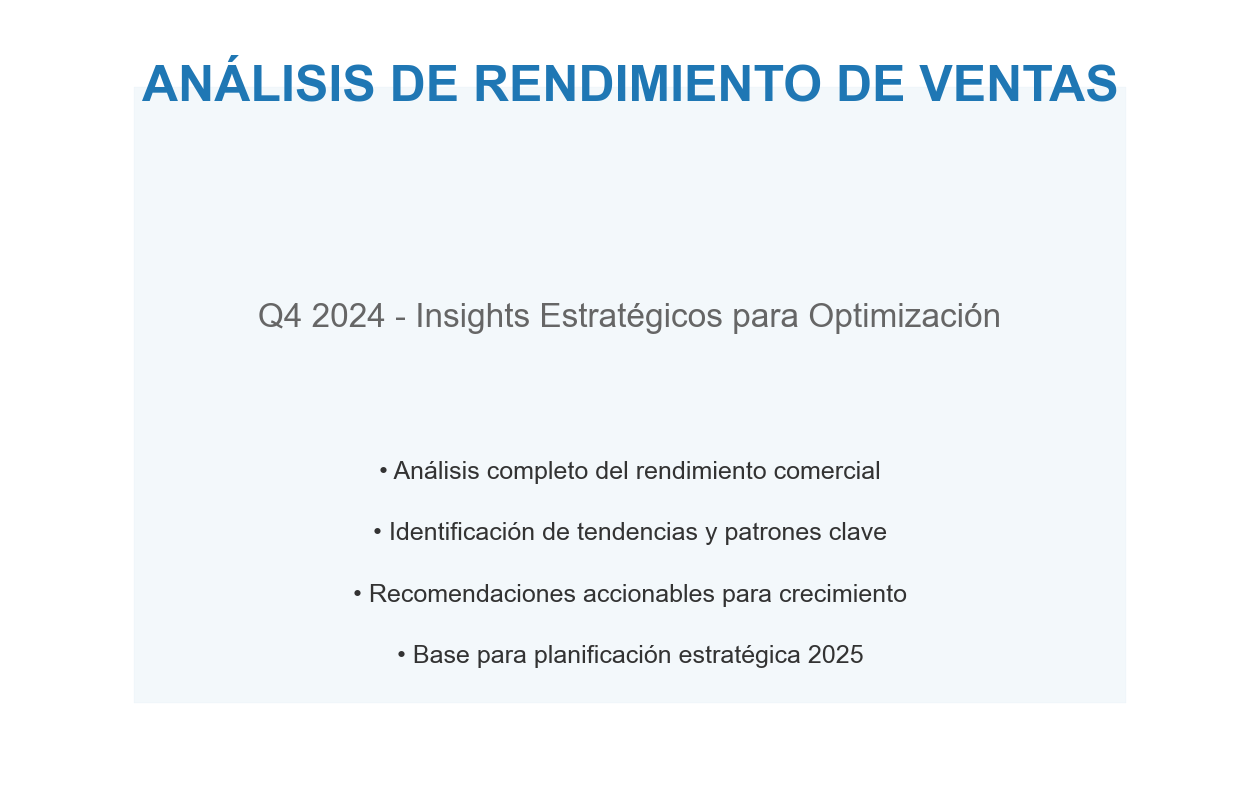

In [103]:
# Diapositiva 1: Título y contexto
fig, ax = plt.subplots(figsize=(16, 10))
ax.axis('off')

# Título principal
ax.text(0.5, 0.9, 'ANÁLISIS DE RENDIMIENTO DE VENTAS', 
        ha='center', va='center', fontsize=36, fontweight='bold', color='#1f77b4')

# Subtítulo
ax.text(0.5, 0.6, 'Q4 2024 - Insights Estratégicos para Optimización', 
        ha='center', va='center', fontsize=24, color='#666666')

# Contexto ejecutivo
contexto = """
• Análisis completo del rendimiento comercial
• Identificación de tendencias y patrones clave
• Recomendaciones accionables para crecimiento
• Base para planificación estratégica 2025
"""

y_pos = 0.4
for line in contexto.strip().split('\n'):
    ax.text(0.5, y_pos, line, ha='center', va='center', 
            fontsize=18, color='#333333')
    y_pos -= 0.08

# Elemento visual de fondo sutil
rect = Rectangle((0.1, 0.1), 0.8, 0.8, fill=True, alpha=0.05, color='#1f77b4')
ax.add_patch(rect)

plt.savefig('diapositiva_01_titulo.png', dpi=300, bbox_inches='tight')
print("Diapositiva de título guardada")

### Diapositiva de insights principales con jerarquía visual

Diapositiva de insights guardada


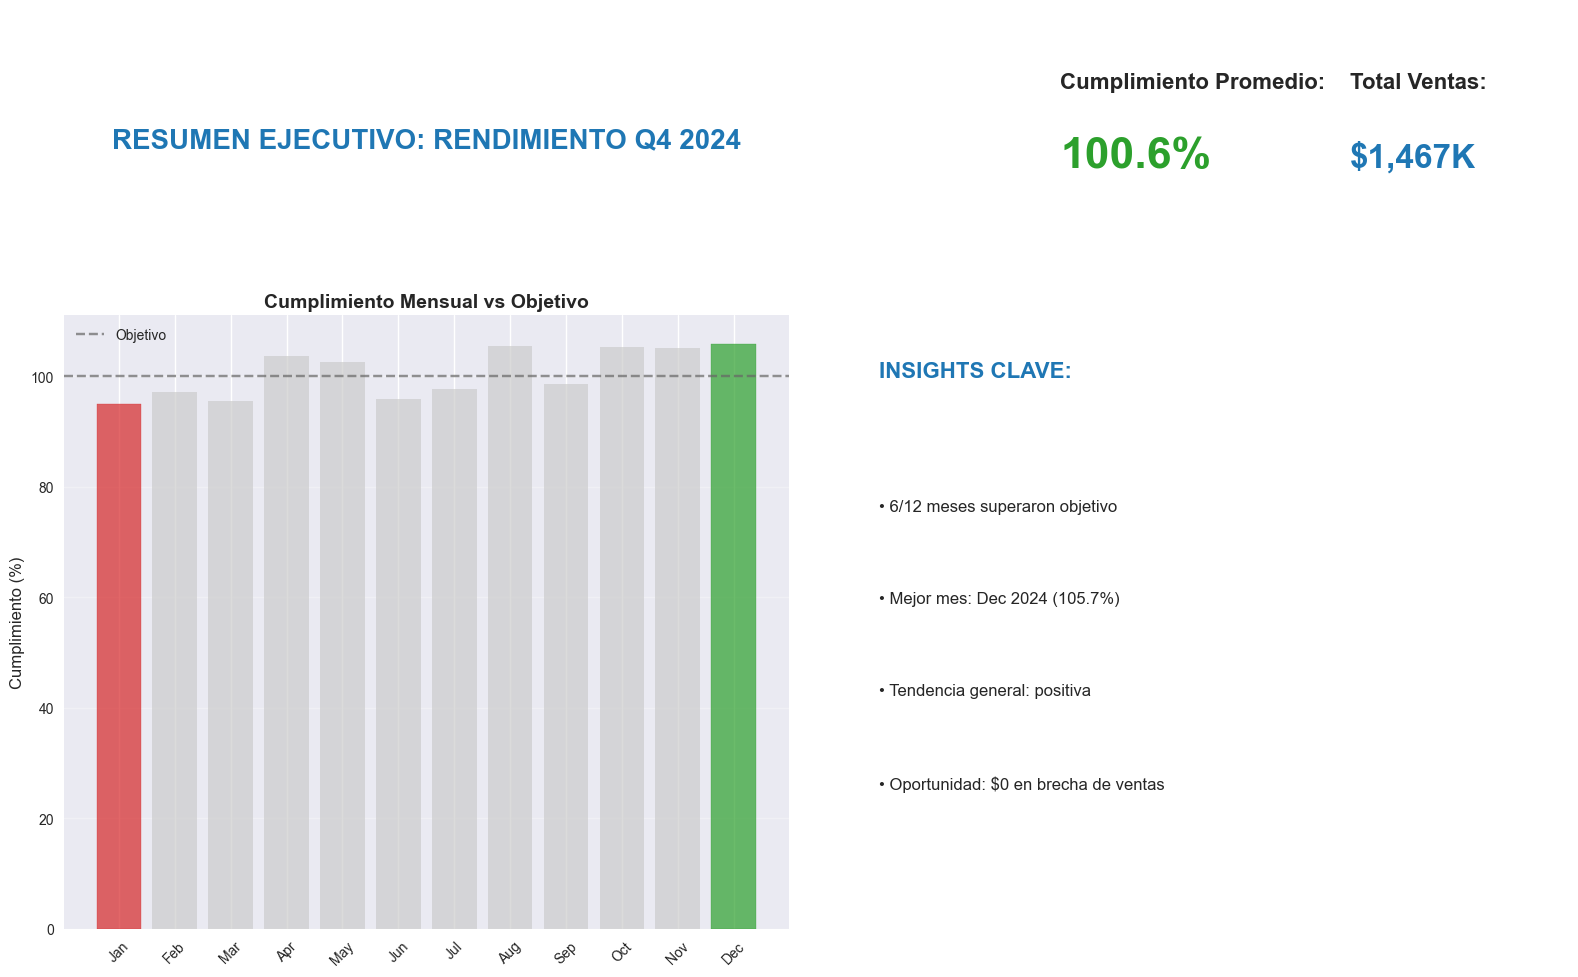

In [104]:
# Diapositiva 2: Insights principales
fig, ((ax_title, ax_kpi), (ax_chart, ax_insights)) = plt.subplots(2, 2, 
                                                                figsize=(16, 10),
                                                                gridspec_kw={'width_ratios': [1, 1], 'height_ratios': [0.3, 0.7]})

# Título de sección
ax_title.text(0.5, 0.5, 'RESUMEN EJECUTIVO: RENDIMIENTO Q4 2024', 
              ha='center', va='center', fontsize=20, fontweight='bold', color='#1f77b4')
ax_title.axis('off')

# KPIs principales (jerarquía alta)
ax_kpi.axis('off')
cumplimiento_promedio = df['cumplimiento'].mean()
color_kpi = '#2ca02c' if cumplimiento_promedio >= 100 else '#ff7f0e' if cumplimiento_promedio >= 95 else '#d62728'

ax_kpi.text(0.3, 0.7, f'Cumplimiento Promedio:', fontsize=16, fontweight='bold')
ax_kpi.text(0.3, 0.4, f'{cumplimiento_promedio:.1f}%', fontsize=32, fontweight='bold', color=color_kpi)

ax_kpi.text(0.7, 0.7, f'Total Ventas:', fontsize=16, fontweight='bold')
ax_kpi.text(0.7, 0.4, f'${df["ventas_real"].sum()/1000:,.0f}K', fontsize=24, fontweight='bold', color='#1f77b4')

# Gráfico principal con énfasis
bars = ax_chart.bar(range(len(df)), df['cumplimiento'], color='#cccccc', alpha=0.7)

# Resaltar mejor y peor mes
mejor_idx = df['cumplimiento'].idxmax()
peor_idx = df['cumplimiento'].idxmin()

bars[mejor_idx].set_color('#2ca02c')  # Verde para mejor
bars[peor_idx].set_color('#d62728')  # Rojo para peor

ax_chart.axhline(y=100, color='#666666', linestyle='--', alpha=0.7, label='Objetivo')
ax_chart.set_xticks(range(len(df)))
ax_chart.set_xticklabels(df['mes'].dt.strftime('%b'), rotation=45)
ax_chart.set_ylabel('Cumplimiento (%)', fontsize=12)
ax_chart.set_title('Cumplimiento Mensual vs Objetivo', fontsize=14, fontweight='bold')
ax_chart.legend()
ax_chart.grid(True, alpha=0.3, axis='y')

# Panel de insights clave (jerarquía alta)
ax_insights.axis('off')
ax_insights.text(0.05, 0.9, 'INSIGHTS CLAVE:', fontsize=16, fontweight='bold', color='#1f77b4')

insights = [
    f"• {len(df[df['cumplimiento'] >= 100])}/12 meses superaron objetivo",
    f"• Mejor mes: {df.loc[mejor_idx, 'mes_nombre']} ({df.loc[mejor_idx, 'cumplimiento']}%)",
    f"• Tendencia general: {'positiva' if df['cumplimiento'].iloc[-3:].mean() > df['cumplimiento'].iloc[:3].mean() else 'estable'}",
    f"• Oportunidad: ${df[df['cumplimiento'] < 95]['ventas_objetivo'].sum():,.0f} en brecha de ventas"
]

y_pos = 0.7
for insight in insights:
    ax_insights.text(0.05, y_pos, insight, fontsize=12, va='top')
    y_pos -= 0.15

plt.tight_layout()
plt.savefig('diapositiva_02_insights_principales.png', dpi=300, bbox_inches='tight')
print("Diapositiva de insights guardada")

### Diapositiva de recomendaciones con llamado a acción

Diapositiva de recomendaciones guardada


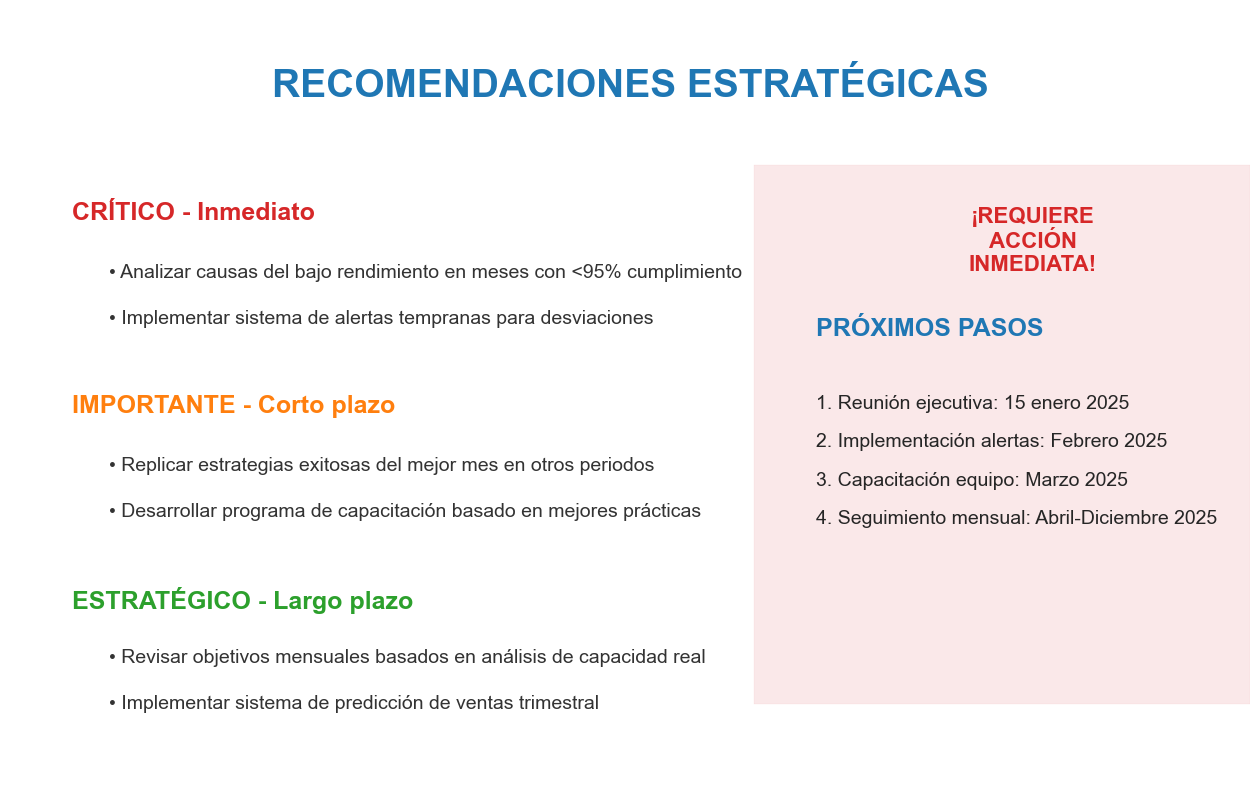

In [105]:
# Diapositiva 3: Recomendaciones y acción
fig, ax = plt.subplots(figsize=(16, 10))
ax.axis('off')

# Título de recomendaciones
ax.text(0.5, 0.9, 'RECOMENDACIONES ESTRATÉGICAS', 
        ha='center', va='center', fontsize=28, fontweight='bold', color='#1f77b4')

# Recomendaciones priorizadas
recomendaciones = [
    ("CRÍTICO - Inmediato", "#d62728", [
        "• Analizar causas del bajo rendimiento en meses con <95% cumplimiento",
        "• Implementar sistema de alertas tempranas para desviaciones"
    ]),
    ("IMPORTANTE - Corto plazo", "#ff7f0e", [
        "• Replicar estrategias exitosas del mejor mes en otros periodos",
        "• Desarrollar programa de capacitación basado en mejores prácticas"
    ]),
    ("ESTRATÉGICO - Largo plazo", "#2ca02c", [
        "• Revisar objetivos mensuales basados en análisis de capacidad real",
        "• Implementar sistema de predicción de ventas trimestral"
    ])
]

y_start = 0.75
for prioridad, color, items in recomendaciones:
    # Encabezado de prioridad
    ax.text(0.05, y_start, prioridad, fontsize=18, fontweight='bold', 
            color=color, va='top')
    
    # Items de la recomendación
    y_item = y_start - 0.08
    for item in items:
        ax.text(0.08, y_item, item, fontsize=14, va='top', color='#333333')
        y_item -= 0.06
    
    y_start -= 0.25

# Próximos pasos
ax.text(0.65, 0.6, 'PRÓXIMOS PASOS', fontsize=18, fontweight='bold', 
        color='#1f77b4', va='top')

proximos_pasos = [
    "1. Reunión ejecutiva: 15 enero 2025",
    "2. Implementación alertas: Febrero 2025",
    "3. Capacitación equipo: Marzo 2025",
    "4. Seguimiento mensual: Abril-Diciembre 2025"
]

y_step = 0.05
for i, paso in enumerate(proximos_pasos):
    ax.text(0.65, 0.55 - (i+1)*y_step, paso, fontsize=14, va='top')

# Elemento visual de urgencia
rect = Rectangle((0.6, 0.099), 0.4, 0.7, fill=True, alpha=0.1, color='#d62728')
ax.add_patch(rect)
ax.text(0.825, 0.7, '¡REQUIERE\nACCIÓN\nINMEDIATA!', 
        ha='center', va='center', fontsize=16, fontweight='bold', color='#d62728')

plt.savefig('diapositiva_03_recomendaciones.png', dpi=300, bbox_inches='tight')
print("Diapositiva de recomendaciones guardada")